## Exercise 10 : Clustering using kMeans 

### Step 1 : Read sampleDataset.csv provided

In [1]:
import pandas as pd

df = pd.read_csv('sampleDataSet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       40 non-null     int64  
 1   TimeStamp                        40 non-null     object 
 2   (140.7468006 41.8188869)         40 non-null     float64
 3   (140.4396435 40.5942053)         0 non-null      float64
 4   (141.7627117 40.1916885)         0 non-null      float64
 5   (140.8733429 38.2932172)         0 non-null      float64
 6   (140.957261 37.6422006)          35 non-null     float64
 7   (140.5346664 36.3965854)         0 non-null      float64
 8   (140.4021967 36.555081)          38 non-null     float64
 9   (139.9744275 35.9510748)         0 non-null      float64
 10  (139.7422865 36.2305774)         0 non-null      float64
 11  (139.0960211 36.4047323)         0 non-null      float64
 12  (138.9138437 36.323256) 

### Step 2 : Check percentage of missing values in each column and drop the columns with missing pixels percentage greater than 95%

In [2]:
perc = 95.0
thresh_count = df.shape[0]- int(((100-perc)/100)*df.shape[0])

df = df.dropna( axis=1, 
                    thresh=thresh_count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40 non-null     int64  
 1   TimeStamp                 40 non-null     object 
 2   (140.7468006 41.8188869)  40 non-null     float64
 3   (140.4021967 36.555081)   38 non-null     float64
 4   (139.1103334 36.2974922)  40 non-null     float64
 5   (140.138552 35.611391)    40 non-null     float64
 6   (139.993363 35.6771308)   40 non-null     float64
 7   (139.9382318 35.374032)   40 non-null     float64
 8   (139.3678037 35.4666052)  40 non-null     float64
 9   (139.466145 35.4718748)   39 non-null     float64
 10  (139.3908038 35.446427)   40 non-null     float64
 11  (137.2331301 36.7425277)  40 non-null     float64
 12  (136.655011 36.5720051)   40 non-null     float64
 13  (138.5998848 35.1758502)  40 non-null     float64
 14  (137.7915988

### Step 3 : Perform mean Imputation if missing values are present in the data

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on to the dataset
mean_imputer = mean_imputer.fit(df.iloc[:, 2:])


# Apply the imputation
df.iloc[:, 2:] = mean_imputer.transform(df.iloc[:, 2:].values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40 non-null     int64  
 1   TimeStamp                 40 non-null     object 
 2   (140.7468006 41.8188869)  40 non-null     float64
 3   (140.4021967 36.555081)   40 non-null     float64
 4   (139.1103334 36.2974922)  40 non-null     float64
 5   (140.138552 35.611391)    40 non-null     float64
 6   (139.993363 35.6771308)   40 non-null     float64
 7   (139.9382318 35.374032)   40 non-null     float64
 8   (139.3678037 35.4666052)  40 non-null     float64
 9   (139.466145 35.4718748)   40 non-null     float64
 10  (139.3908038 35.446427)   40 non-null     float64
 11  (137.2331301 36.7425277)  40 non-null     float64
 12  (136.655011 36.5720051)   40 non-null     float64
 13  (138.5998848 35.1758502)  40 non-null     float64
 14  (137.7915988

/home/student/s1290229/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


### Step 4 :  Using Elbow k Means find best k value 

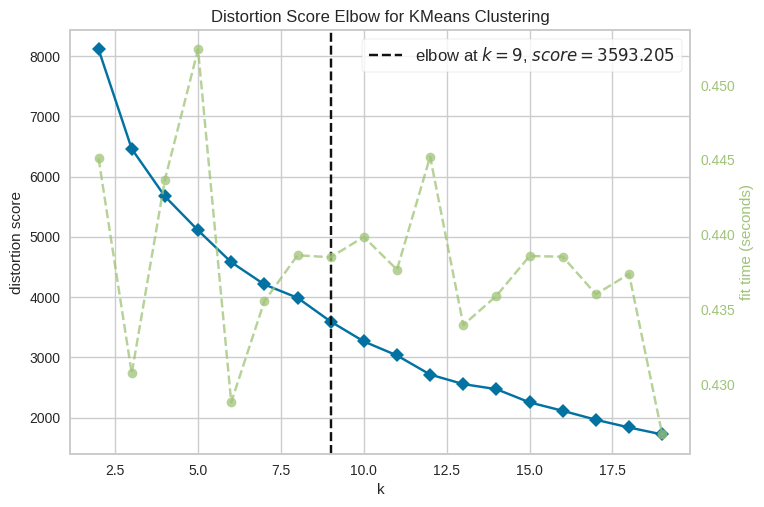

The best k value is 9


In [9]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans  

kmeans = KMeans(n_init=10, random_state=6)

visualizer = KElbowVisualizer(kmeans,
                              #metric="silhouette",
                              k=(2,20))
visualizer.fit(df.iloc[:, 2:])    # Fit the data to the visualizer
visualizer.poof()  

n = visualizer.elbow_value_
print('The best k value is {}'.format(n))

### Step 5 : Apply K Means using best k-value

In [32]:
kmeans = KMeans(n_init=10, n_clusters=n)  
kmeans.fit(df.iloc[:, 2:])
df.iloc[:, 2:]

,(140.7468006 41.8188869),(140.4021967 36.555081),(139.1103334 36.2974922),(140.138552 35.611391),(139.993363 35.6771308),(139.9382318 35.374032),(139.3678037 35.4666052),(139.466145 35.4718748),(139.3908038 35.446427),(137.2331301 36.7425277),(136.655011 36.5720051),(138.5998848 35.1758502),(137.7915988 34.7918944),(136.8127001 35.1404408),(135.0986062 34.6935289),(134.7906399 34.7659515),(135.790301 34.509211),(135.7079001 34.6916695),(133.9318657 34.4600964),(134.2940462 34.7473902)
0,9.0,6.000000,5.0,4.0,3.0,5.0,8.0,1.000000,3.0,8.0,6.0,0.0,6.0,5.0,10.0,3.0,5.0,7.000000,2.0,8.0
1,0.0,8.000000,10.0,-4.0,0.0,6.0,6.0,2.000000,4.0,3.0,6.0,0.0,3.0,5.0,11.0,4.0,4.0,8.000000,2.0,6.0
2,2.0,7.000000,-2.0,2.0,2.0,5.0,4.0,3.000000,3.0,7.0,7.0,4.0,3.0,-2.0,15.0,2.0,8.0,3.000000,2.0,11.0
3,4.0,9.000000,1.0,1.0,4.0,1.0,3.0,6.000000,1.0,7.0,6.0,-2.0,4.0,3.0,8.0,1.0,8.0,3.000000,1.0,11.0
4,4.0,3.000000,6.0,0.0,1.0,2.0,4.0,5.000000,2.0,7.0,7.0,3.0,6.0,0.0,13.0,0.0,5.0,4.000000,1.0,8.0
5,-1.0,4.000000,-8.0,3.0,3.0,1.0,4.0,5.000000,1.0,0.0,7.0,1.0,7.0,0.0,8.0,1.0,5.0,1.000000,1.0,4.0
6,6.0,4.000000,14.0,2.0,7.0,2.0,3.0,4.000000,1.0,3.0,10.0,3.0,6.0,4.0,7.0,2.0,8.0,-1.000000,2.0,7.0
7,10.0,3.000000,-1.0,6.0,5.0,4.0,3.0,5.000000,0.0,3.0,7.0,-1.0,8.0,-3.0,7.0,2.0,6.0,2.000000,3.0,-2.0
8,3.0,4.000000,-5.0,3.0,4.0,7.0,5.0,9.000000,1.0,0.0,8.0,6.0,5.0,2.0,7.0,2.0,6.0,3.000000,5.0,-4.0
9,6.0,4.000000,-3.0,2.0,5.0,3.0,4.0,10.000000,1.0,5.0,9.0,2.0,5.0,4.0,8.0,3.0,8.0,-1.000000,13.0,13.0


### Step 7 :(Optional) Create geopandas dataframe with geometry and kmeans labels

In [22]:
loc = list(df.dropna(axis=1, how='all').columns[1:])
# loc
x_cord = []
y_cord = []
for l in loc[1:]:
    x,y = l.replace("(","").replace(")","").split(" ")
    x_cord.append(float(x))
    y_cord.append(float(y))
    
import geopandas
kmeans.labels_
geometry = geopandas.points_from_xy(x_cord, y_cord)
print(geometry)
len(kmeans.labels_)
# geo_df = geopandas.GeoDataFrame(kmeans.labels_, geometry=geometry)
# geo_df.columns = ['label','geometry']
# geo_df.head()

<GeometryArray>
[<POINT (140.747 41.819)>, <POINT (140.402 36.555)>,  <POINT (139.11 36.297)>,
 <POINT (140.139 35.611)>, <POINT (139.993 35.677)>, <POINT (139.938 35.374)>,
 <POINT (139.368 35.467)>, <POINT (139.466 35.472)>, <POINT (139.391 35.446)>,
 <POINT (137.233 36.743)>, <POINT (136.655 36.572)>,   <POINT (138.6 35.176)>,
 <POINT (137.792 34.792)>,  <POINT (136.813 35.14)>, <POINT (135.099 34.694)>,
 <POINT (134.791 34.766)>,  <POINT (135.79 34.509)>, <POINT (135.708 34.692)>,
  <POINT (133.932 34.46)>, <POINT (134.294 34.747)>]
Length: 20, dtype: geometry


40

### Step 8 :(Optional) Create Folium map to view clusters

In [7]:
import folium 

map = folium.Map(location = [13.406,80.110], tiles = "Stamen Terrain", zoom_start = 9)

ModuleNotFoundError: No module named 'folium'

###  Assign colors for each label on the map and add cluster labels to the plot

In [ ]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_dataframe.geometry ]


# Iterate through list and add a marker for each unique label.
i = 0
for coordinates in geo_df_list:
    #assign a color marker 
    if geo_df.label[i] == 0:
        type_color = "green"
    elif geo_df.label[i] == 1:
        type_color = "blue"
    elif geo_df.label[i] == 2:
        type_color = "orange"
    else:
        type_color = "purple"
        
     # Place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1
    